In [1]:
import numpy as np
import rdkit
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from molreps.graph import MolGraph
from molreps.methods.mol_rdkit import rdkit_add_conformer
import networkx as nx
from molreps.methods.mol_py3d import MolTo3DView

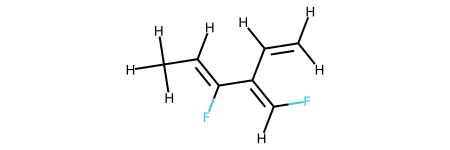

In [2]:
smile = "C\C=C(/F)\C(=C\F)\C=C"
# smile = 'CC(C)(C)NC[C@@H](C1=CC(=C(C=C1)O)CO)O'
m = rdkit.Chem.MolFromSmiles(smile)
m = rdkit.Chem.AddHs(m) # add H's to the molecule
# rdkit.Chem.AssignStereochemistry(m) # Assign Stereochemistry
rdkit.Chem.FindPotentialStereo(m) # Assign Stereochemistry new method
m

In [10]:
# If no coordinates are known, do embedding with rdkit
AllChem.EmbedMolecule(m)
AllChem.MMFFOptimizeMolecule(m)
AllChem.EmbedMultipleConfs(m, numConfs=5)
# Plot molecule 3D
MolTo3DView(m)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [35]:
# Chem.MolToMolFile(m)
m.SetProp("_Name",smile)
m.SetProp("MolFileComments","Energy: 1.234 eV") # Maybe not use both Info and Comments
m.SetProp("MolFileInfo","DataBase: 1")
print(rdkit.Chem.MolToMolBlock(m)) 
rdkit.Chem.MolToMolFile(m,"mol_1.mol",confId=0)

C\C=C(/F)\C(=C\F)\C=C
DataBase: 1
Energy: 1.234 eV
 17 16  0  0  0  0  0  0  0  0999 V2000
    2.5452   -1.1860   -0.2368 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0803   -0.7940   -0.2319 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6517    0.3463    0.2444 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7338    1.1114    0.7293 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6840    0.8711    0.3263 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7731    2.1151    0.8917 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9826    2.6930    1.0134 F   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8839    0.2408   -0.1104 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1872   -0.8736   -0.6631 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8404   -1.4763    0.7874 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7236   -1.9635   -0.9782 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0867   -0.2520   -0.5507 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3982   -1.4841   -0.6337 H   0  0  0  0  0  0  0  0  0  0  0  0

In [46]:
# Or Alternative PDBBlock
# No Commentline possible here. 
# Additional Info external.
# Or write a wrapper with
m.SetProp("PDBFileComments","Test")
print(rdkit.Chem.MolToPDBBlock(m))
rdkit.Chem.MolToPDBFile(m,"mol_1.pdb")

COMPND    C\C=C(/F)\C(=C\F)\C=C
MODEL        1
HETATM    1  C1  UNL     1       2.545  -1.186  -0.237  1.00  0.00           C  
HETATM    2  C2  UNL     1       1.080  -0.794  -0.232  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.652   0.346   0.244  1.00  0.00           C  
HETATM    4  F1  UNL     1       1.734   1.111   0.729  1.00  0.00           F  
HETATM    5  C4  UNL     1      -0.684   0.871   0.326  1.00  0.00           C  
HETATM    6  C5  UNL     1      -0.773   2.115   0.892  1.00  0.00           C  
HETATM    7  F2  UNL     1      -1.983   2.693   1.013  1.00  0.00           F  
HETATM    8  C6  UNL     1      -1.884   0.241  -0.110  1.00  0.00           C  
HETATM    9  C7  UNL     1      -2.187  -0.874  -0.663  1.00  0.00           C  
HETATM   10  H1  UNL     1       2.840  -1.476   0.787  1.00  0.00           H  
HETATM   11  H2  UNL     1       2.724  -1.964  -0.978  1.00  0.00           H  
HETATM   12  H3  UNL     1       3.087  -0.252  -0.551  1.00  

In [48]:
print(rdkit.Chem.MolToV3KMolBlock(m))

C\C=C(/F)\C(=C\F)\C=C
DataBase: 1
Energy: 1.234 eV
  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 17 16 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C 2.545179 -1.186045 -0.236816 0
M  V30 2 C 1.080318 -0.793951 -0.231929 0
M  V30 3 C 0.651675 0.346323 0.244408 0
M  V30 4 F 1.733842 1.111441 0.729251 0
M  V30 5 C -0.684028 0.871099 0.326284 0
M  V30 6 C -0.773090 2.115091 0.891658 0
M  V30 7 F -1.982594 2.693033 1.013387 0
M  V30 8 C -1.883935 0.240832 -0.110365 0
M  V30 9 C -2.187205 -0.873624 -0.663123 0
M  V30 10 H 2.840447 -1.476251 0.787398 0
M  V30 11 H 2.723644 -1.963542 -0.978219 0
M  V30 12 H 3.086693 -0.251970 -0.550688 0
M  V30 13 H 0.398223 -1.484061 -0.633738 0
M  V30 14 H 0.143189 2.563719 1.209972 0
M  V30 15 H -2.832315 0.877330 0.070059 0
M  V30 16 H -3.274882 -1.094873 -0.896791 0
M  V30 17 H -1.585163 -1.694553 -0.970747 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 1 3 5
M  V30 5 2 5 6
M  V30 6 1 6 7
M  V30 7 

In [49]:
print(rdkit.Chem.MolToTPLBlock(m))

BioCAD format, all rights reserved
Output from RDKit
NAME C\C=C(/F)\C(=C\F)\C=C
PROP 7 1
17 16
1 C 0 0.0 254.518 -118.604 -23.6816 4 2 10 11 12 U
2 C 0 0.0 108.032 -79.3951 -23.1929 3 1 3 13 U
3 C 0 0.0 65.1675 34.6323 24.4408 3 2 4 5 U
4 F 0 0.0 173.384 111.144 72.9251 1 3 U
5 C 0 0.0 -68.4028 87.1099 32.6284 3 3 6 8 U
6 C 0 0.0 -77.309 211.509 89.1658 3 5 7 14 U
7 F 0 0.0 -198.259 269.303 101.339 1 6 U
8 C 0 0.0 -188.393 24.0832 -11.0365 3 5 9 15 U
9 C 0 0.0 -218.72 -87.3624 -66.3123 3 8 16 17 U
10 H 0 0.0 284.045 -147.625 78.7398 1 1 U
11 H 0 0.0 272.364 -196.354 -97.8219 1 1 U
12 H 0 0.0 308.669 -25.197 -55.0688 1 1 U
13 H 0 0.0 39.8223 -148.406 -63.3738 1 2 U
14 H 0 0.0 14.3189 256.372 120.997 1 6 U
15 H 0 0.0 -283.231 87.733 7.00585 1 8 U
16 H 0 0.0 -327.488 -109.487 -89.6791 1 9 U
17 H 0 0.0 -158.516 -169.455 -97.0747 1 9 U
1 1.0 1 2 0 0
2 2.0 2 3 0 0
3 1.0 3 4 0 0
4 1.0 3 5 0 0
5 2.0 5 6 0 0
6 1.0 6 7 0 0
7 1.0 5 8 0 0
8 2.0 8 9 0 0
9 1.0 1 10 0 0
10 1.0 1 11 0 0
11 1.0 1 12 0 